# TP : Location de vélos en libre-service

L’organisme de gestion d’un système de location de vélos en libre-service (ex: Vélib) cherche à organiser ses équipes de maintenance pour répondre au mieux à la demande de ses clients.
<br> <br> **Votre mission :** <br>
Réaliser un modèle permettant de prédire le nombre de vélos loués par heure

**Objectifs de ce TP :** <br>
* Dérouler la méthodologie du « POC » sur une problématique donnée
* Utiliser les grandes familles d’algorithmes présentées en cours
* Mettre en place les pratiques adaptées pour l’entraînement d’un modèle

**Format du rendu :** <br>
* Le code fourni doit être écrit en Python et en format Jupyter Notebook. ​
* Votre notebook doit contenir du code, du texte et des graphiques. Vous devez envoyer l’export HTML de votre notebook avec toutes les cellules exécutées. Assurez-vous que le fichier produit est lisible.​
* Vous pouvez utiliser n’importe quelle libraire Python que vous jugez nécessaire.​
* Il ne s’agit pas d’une competition de type Kaggle : vous ne serez pas uniquement évalué sur la performance du modèle mais plutôt sur la pertinence et la justification de vos choix ainsi que sur la qualité de vos explications.


Voici un descriptif de l'ensemble des variables :
* *instant* - index du relevé
* *dteday* - date du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *mnth* - mois du relevé (entre 1 et 12)
* *hr* - heure du relevé (entre 0 et 23)
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *weekday* - day of the week
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

## Questions préalables

**1) Quelle famille d’algorithmes semble adaptée à la mission qui vous a été confiée ?**

 Des algorithmes d'apprentissage supervisé, plus précisemment des modèles de régression, semblent les plus adaptées à la mission.

**2) Quelles variables sont susceptibles de constituer une « cible » ?**

Les variables susceptibles de constituer une cible sont :
- count: nombre total de locations
- casual: locations des usagers non abonnés
- registered: locations des usagers abonnés

## Imports

Vous ajouterez les éventuels imports supplémentaires nécessaires à la cellule ci-dessous :

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extraction et prise en main de la donnée

Dans cette partie, on va commencer par lire les données et vérifier leur intégrité. C'est également le moment de s'assurer qu'on comprend bien l'ensemble des champs que l'on a à disposition. 

In [7]:
df = pd.read_csv("../data/input/velo.csv")
df.head()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0,0,1,1


On s'intéresse aux types de nos variables.

In [8]:
df.dtypes

instant         int64
dteday         object
season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

On regarde les statistiques descriptives de nos variables.

In [9]:
df.describe()

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15715.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,6.537775,11.546752,0.028770,3.003683,1.425283,20.376474,23.788755,62.774038,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,3.438776,6.914405,0.167165,2.005771,0.639357,7.894801,8.592511,19.321135,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,4.000000,6.000000,0.000000,1.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,10.000000,18.000000,0.000000,5.000000,2.000000,27.060000,31.060000,78.500000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,12.000000,23.000000,1.000000,6.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**3) A partir de ces analyses ainsi que d'analyses additionnelles dont le code sera exécuté ci-dessous, quelles remarques pouvez-vous faire sur la qualité de données ? Le descriptif des variables vous paraît-il complet et exact ?**

Nous avons plus de 1600 valeurs manquantes pour la variables `hum`.

In [10]:
df.isna().sum()

instant          0
dteday           0
season           0
mnth             0
hr               0
holiday          0
weekday          0
weathersit       0
temp             0
atemp            0
hum           1664
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

Cela représente environ 0.17 % de données manquantes.

In [11]:
print(100 * df['hum'].isna().sum() / df['hum'].sum() )

0.16867816732793103


Toutes les variables sont lues comme numériques, or elles ne le sont pas toutes: </br> 

* instant : il s'agit d'un index
* dteday : c'est une variable de date
* season: c'est une variable qualitative
* mth : qualitative
* hr : qualitative
* weekday : qualitatif

## Préparation

**4) Quelles sont les variables catégorielles ? Les variables numériques ? En complétant le code ci-dessous, vous vous assurerez du bon typage de la donnée à traiter.**

In [12]:
cat_vars = [
    "season",   # saison
    "mnth",     # mois
    "hr",       # heure
    "holiday",  # vacances scolaires
    "weekday",  # jour de semaine
    "weathersit"   # conditions météo
]

In [13]:
# Typage des variables catégorielles
for c in cat_vars:
    df[c] = df[c].astype("category")

# Conversion de la date
df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")

# Variables numériques : tout sauf les catégorielles et la date
num_vars = [c for c in df.columns if c not in cat_vars + ["dteday"]]

# Aperçu des listes retenues
{"cat_vars": cat_vars, "num_vars": num_vars}

{'cat_vars': ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit'],
 'num_vars': ['instant',
  'temp',
  'atemp',
  'hum',
  'windspeed',
  'casual',
  'registered',
  'cnt']}

## Exploration

Pour se faciliter la lecture et le travail sur le jeu de données, on va renommer nos variables ainsi que leurs catégories pour celles qui en ont.

In [14]:
# Renommage des colonnes en français pour une lecture plus claire
nouveaux_noms = {
    "instant": "index",
    "dteday": "date",
    "season": "saison",
    "mnth": "mois",
    "hr": "heure",
    "holiday": "vacances_scolaires",
    "weekday": "jour_semaine",
    "weathersit": "meteo",
    "temp": "temperature",
    "atemp": "temperature_ressentie",
    "hum": "humidite",
    "windspeed": "vitesse_vent",
    "casual": "locations_non_abonnes",
    "registered": "locations_abonnes",
    "cnt": "locations_totales"
}

df = df.rename(columns=nouveaux_noms)

Pour les variables catégorielles, on veut modifier les noms des catégories pour les mêmes raisons.

In [15]:
# Remappage des valeurs des catégories en français lisible
# Saison
df['saison'] = df['saison'].map({1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'})

# Jour de semaine
df['jour_semaine'] = df['jour_semaine'].map({0: 'dimanche', 1: 'lundi', 2: 'mardi', 3: 'mercredi', 4: 'jeudi', 5: 'vendredi', 6: 'samedi'})

# Vacances scolaires
df['vacances_scolaires'] = df['vacances_scolaires'].map({0: 'non', 1: 'oui'})

# Météo
df['meteo'] = df['meteo'].map({1: 'dégagé_nuageux', 2: 'brouillard', 3: 'légère_pluie_neige', 4: 'fortes_averses'})

**5) Que pouvez-vous analyser à partir des graphiques ci-dessous ?**

Ce graphique représente la moyenne de vélos loués par jour. On peut voir qu'il y a une influence du jour de la semaine, sur le nombre de vélo loués en moyenne:

* jeudi et vendredi: les deux jours avec la moyenne la plus élevées
* mardi, mercredi et samedi: juste en dessous
* lundi: moins de locations encore
* dimanche: le jour avec le moins de locations

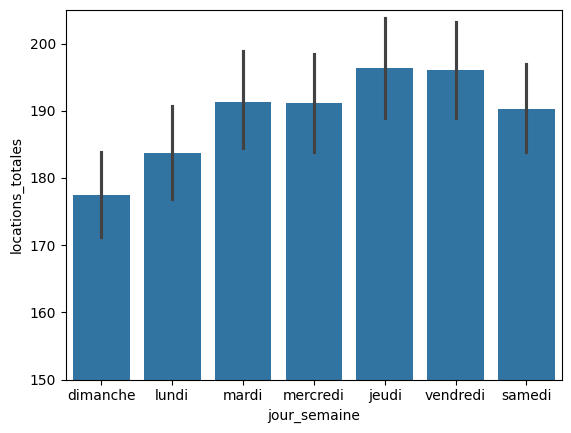

In [16]:
sns.barplot(x="jour_semaine", y="locations_totales", data=df, estimator=np.mean)
plt.ylim(150,205)
plt.show()

Ici on représente le nombre median de vélos loués en fonction du jour de la semaine. On voit qu'il ya une différence par rapport au graphique précedent, notamment que le jeudi a une mediane inferieure à vendredi alors que pour la moyenne c'était l'inverse. Cela peut signifier par exemple qu'il ya des valeurs extrêmes plus grandes le vendredi que le jeudi.

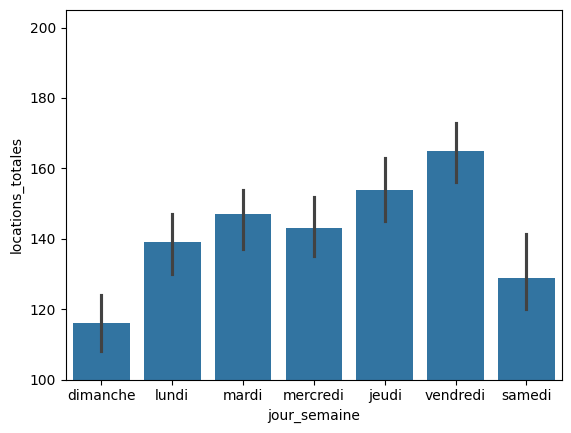

In [17]:
sns.barplot(x="jour_semaine", y="locations_totales", data=df, estimator=np.median)
plt.ylim(100,205)
plt.show()

On réprésente ici le nombre médian de vélos loués en fonction de l'heure de la journée. On obeserve 2 pics dans la journées, qui correspondent aux horaires dites de "bureaux". 

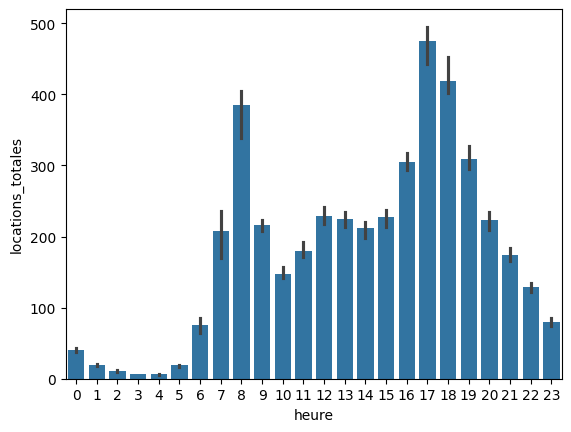

In [18]:
sns.barplot(x="heure", y="locations_totales", data=df, estimator=np.median)
plt.show()

Ici on représente le nombre moyen de vélos loués par heure en fonction du jour de la semaine. On remarque que la tendance est différente entre les jours de la semaine et ceux du week-end. Donc les comportements des loueurs de vélos sont différents.

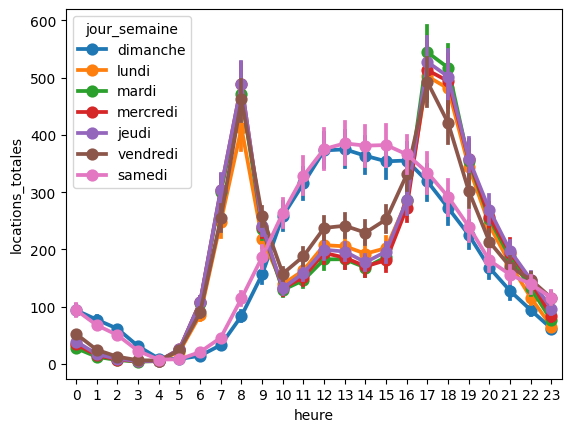

In [19]:
sns.pointplot(data=df, x='heure', y='locations_totales', hue='jour_semaine')
plt.show()

Ici on représente le nombre median de vélos loués en fonction de la température extérieure. On voit que jusqu'à l'intervalle 30-35 degrès, plus il fait chaud plus le nombre de location augmente, ensuite il ne croît plus. 

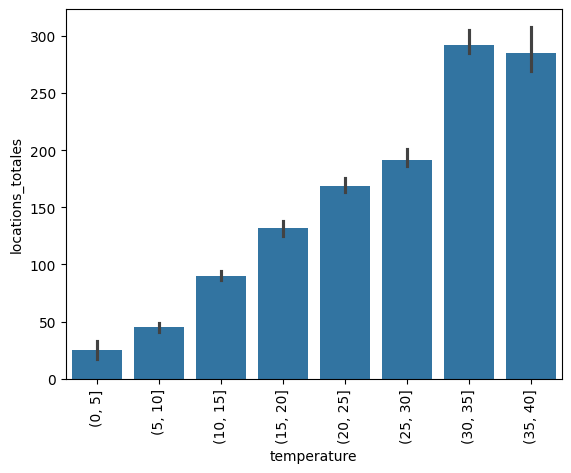

In [20]:
temp_range = range(0, round(df["temperature"].max()), 5)
temp_binned = pd.cut(df["temperature"], bins=temp_range)
temp_plot = sns.barplot(x=temp_binned, y=df["locations_totales"], estimator=np.median)
plt.xticks(rotation=90)
plt.show()

**6) Montrez des graphiques supplémentaires pertinents vous permettant de mieux comprendre les facteurs d'impact sur le nombre de vélos loués. Pour chacun de ces graphiques vous proposerez une analyse.**

In [24]:
df.head()

,index,date,saison,mois,heure,vacances_scolaires,jour_semaine,meteo,temperature,temperature_ressentie,humidite,vitesse_vent,locations_non_abonnes,locations_abonnes,locations_totales
0,1,2011-01-01,Hiver,1,0,non,samedi,dégagé_nuageux,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Hiver,1,1,non,samedi,dégagé_nuageux,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Hiver,1,2,non,samedi,dégagé_nuageux,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Hiver,1,3,non,samedi,dégagé_nuageux,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Hiver,1,4,non,samedi,dégagé_nuageux,9.84,14.395,75.0,0.0,0,1,1


On s'intéresse au nombre median de locations de vélos

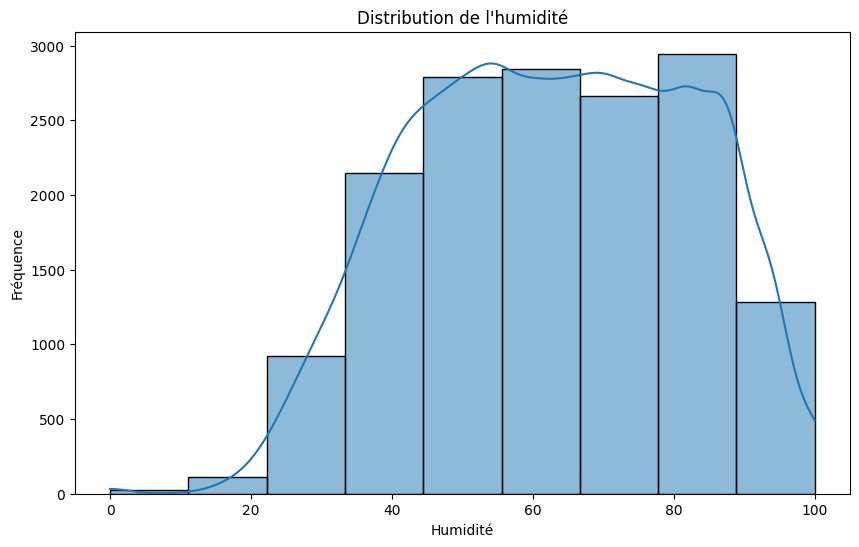

In [27]:
#  Option 1 : Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='humidite', bins=9, kde=True)
plt.title('Distribution de l\'humidité')
plt.xlabel('Humidité')
plt.ylabel('Fréquence')
plt.show()

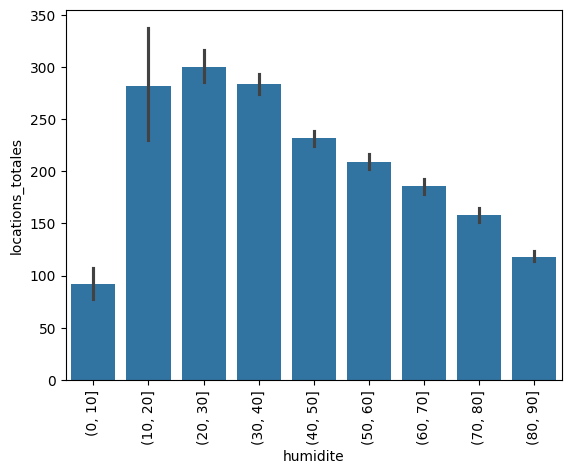

In [28]:
hum_range = range(round(df["humidite"].min()), round(df["humidite"].max()), 10)
hum_binned = pd.cut(df["humidite"], bins=hum_range)
hum_plot = sns.barplot(x=hum_binned, y=df["locations_totales"], estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

**7) Proposez une visualisation pertinente à partir d'une approche non-supervisée**

## Feature Engineering

**8) Ajoutez à ce dataset une "feature" qui vous semble pertinente. Comment pouvez-vous évaluer l'apport potentiel de cette feature ? Montrez les graphiques ou tableaux pertinents pour appuyer votre réponse.**

## Algorithmes et Validation (entraînement de l'algorithme prédictif)

Dans cette partie, vous allez entraîner un modèle prédictif pour prédire le nombre total de locations de vélos. **Utilisez la librairie sklearn** et lisez attentivement la documentation des fonctions que vous serez amenés à choisir. De manière générale, **commencez simple** et vous pourrez améliorer votre modèle dans la partie suivante, ou donner vos pistes de réflexion à la fin de ce TP.

**9) Séparez au sein du dataset vos jeux d'entraînement et de test. A quoi cette étape sert-elle ?**

**10) Choisissez un modèle et indiquez les raisons de ce choix. Si des pré-traitements spécifiques sont nécessaires à la bonne exécution et performance de l'algorithme, vous les effectuerez ici en indiquant pourquoi ils sont nécessaires. Vous pourrez ensuite procéder à l'entraînement de votre modèle à l'aide de la fonction *fit* présente sur l'ensemble des estimateurs sklearn**

**11) Ce premier modèle est-il performant ? Comment mesurez-vous sa performance et pourquoi ?**

## Améliorer le modèle

**12) Quelles données supplémentaires permettraient d’avoir une prédiction plus précise ? De quelles données aurait-on besoin pour assurer la maintenance complète des bornes de location ?**

**13) Mettez en place les techniques de régularisation adaptées à l’algorithme choisi**

**14) Mettez en place le choix des meilleurs hyperparamètres**

**15) Quelle(s) autre(s) approche(s) aurait pu être pertinente(s) ? Vous pourrez indiquer ici les pistes d'améliorations que vous envsageriez si vous étiez amené à poursuivre ce projet**